In [ ]:
1. 신생아 이름 데이터를 이용하여 다음과 같은 분석을 진행하시오.

-유명인, 성서에 등장하는 이름 등 외부 이름을 이용하여 이름 유행을 분석
-각 연도별 가장 인기 있는 이름을 분석
-다음 이름의 연도별 순위 조사(john, sophia, michael, daniel, carter)
-각 연도별, 성별 상위 50% 이름을 구성하는 알파벳 문자 중, 자음과 모음의 비율 분석
-가장 긴 이름과 가장 짧은 이름을 출력
-시각화도 함께 ...

In [141]:
import numpy as np
import pandas as pd

pieces=[]
for year in range(1880,2011):
    path=("names/names/yob%d.txt" %year)
    df=pd.read_csv(path, names=["name","sex","births"])
    df["year"]=year
    pieces.append(df)
names=pd.concat(pieces, ignore_index=True)
names


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [4]:
#1.
Elizabeth=names[names["name"]=="Elizbeth"]
Elizabeth_table=Elizabeth.pivot_table("births" ,index=["year"])
Elizabeth_table.plot(kind="bar",figsize=(30,20))
Elizabeth.sort_values(by="births", ascending=False) #1960년대 max  #실제 엘리자베스 여왕이 왕위로 인정된 년도 1953년

,name,sex,births,year
574626,Elizbeth,F,27,1960
286309,Elizbeth,F,21,1931
235876,Elizbeth,F,21,1926
140506,Elizbeth,F,21,1917
193047,Elizbeth,F,20,1922
...,...,...,...,...
96151,Elizbeth,F,5,1911
87024,Elizbeth,F,5,1909
24133,Elizbeth,F,5,1890
1013495,Elizbeth,F,5,1987


In [5]:
#2.
name_table=names.pivot_table(index=["year","sex"], columns="name", aggfunc=sum)
name_table

births                                                            \
name      Aaban Aabid Aabriella Aadam Aadan Aadarsh   Aaden Aadesh Aadhav   
year sex                                                                    
1880 F      NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN   
     M      NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN   
1881 F      NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN   
     M      NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN   
1882 F      NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN   
...         ...   ...       ...   ...   ...     ...     ...    ...    ...   
2008 M      NaN   NaN       NaN   6.0  22.0    13.0   955.0    NaN    NaN   
2009 F      NaN   NaN       NaN   NaN   NaN     NaN     5.0    NaN    NaN   
     M      6.0   NaN       NaN   9.0  23.0    16.0  1265.0    5.0    5.0   
2010 F      NaN   NaN       NaN   NaN   NaN     NaN     NaN    NaN    NaN   
     M      9.0   NaN       NaN   7.0  11.0     NaN   448.0    NaN   13.0   

                   ...                                                         \
name     Aadhavan  ... Zyrus Zysean Zyshaun Zyshawn Zyshon Zyshonne Zytavious   
year sex           ...                                                          
1880 F        NaN  ...   NaN    NaN     NaN     NaN    NaN      NaN       NaN   
     M        NaN  ...   NaN    NaN     NaN     NaN    NaN      NaN       NaN   
1881 F        NaN  ...   NaN    NaN     NaN     NaN    NaN      NaN       NaN   
     M        NaN  ...   NaN    NaN     NaN     NaN    NaN      NaN       NaN   
1882 F        NaN  ...   NaN    NaN     NaN     NaN    NaN      NaN       NaN   
...           ...  ...   ...    ...     ...     ...    ...      ...       ...   
2008 M        NaN  ...   9.0    NaN     6.0    14.0    NaN      NaN       NaN   
2009 F        NaN  ...   NaN    NaN     NaN     NaN    NaN      NaN       NaN   
     M        NaN  ...   NaN    NaN     NaN     7.0    NaN      NaN       7.0   
2010 F        NaN  ...   NaN    NaN     NaN     NaN    NaN      NaN       NaN   
     M        5.0  ...   NaN    NaN     NaN     9.0    NaN      NaN       6.0   

                               
name     Zyvion Zyyanna Zzyzx  
year sex                       
1880 F      NaN     NaN   NaN  
     M      NaN     NaN   NaN  
1881 F      NaN     NaN   NaN  
     M      NaN     NaN   NaN  
1882 F      NaN     NaN   NaN  
...         ...     ...   ...  
2008 M      NaN     NaN   NaN  
2009 F      NaN     NaN   NaN  
     M      5.0     NaN   NaN  
2010 F      NaN     6.0   NaN  
     M      NaN     NaN   5.0  

[262 rows x 88496 columns]

In [29]:
for year in range(1880,2011):
    print("%d년도의 가장 인기있는 여자아이 이름은 %s입니다." %(year, names[names["year"]==year][names[names["year"]==year]["sex"]=="F"].sort_values(by="births",ascending=False).iloc[:1,0].values))
    print("%d년도의 가장 인기있는 남자아이 이름은 %s입니다." %(year, names[names["year"]==year][names[names["year"]==year]["sex"]=="M"].sort_values(by="births",ascending=False).iloc[:1,0].values))

1880년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1880년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1881년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1881년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1882년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1882년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1883년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1883년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1884년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1884년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1885년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1885년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1886년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1886년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1887년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1887년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1888년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1888년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1889년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1889년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1890년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1890년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1891년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1891년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1892년도의 가장 인기있는 여자아이 이름은 ['Mary']입니다.
1892년도의 가장 인기있는 남자아이 이름은 ['John']입니다.
1893년도의 가장 인

1991년도의 가장 인기있는 여자아이 이름은 ['Ashley']입니다.
1991년도의 가장 인기있는 남자아이 이름은 ['Michael']입니다.
1992년도의 가장 인기있는 여자아이 이름은 ['Ashley']입니다.
1992년도의 가장 인기있는 남자아이 이름은 ['Michael']입니다.
1993년도의 가장 인기있는 여자아이 이름은 ['Jessica']입니다.
1993년도의 가장 인기있는 남자아이 이름은 ['Michael']입니다.
1994년도의 가장 인기있는 여자아이 이름은 ['Jessica']입니다.
1994년도의 가장 인기있는 남자아이 이름은 ['Michael']입니다.
1995년도의 가장 인기있는 여자아이 이름은 ['Jessica']입니다.
1995년도의 가장 인기있는 남자아이 이름은 ['Michael']입니다.
1996년도의 가장 인기있는 여자아이 이름은 ['Emily']입니다.
1996년도의 가장 인기있는 남자아이 이름은 ['Michael']입니다.
1997년도의 가장 인기있는 여자아이 이름은 ['Emily']입니다.
1997년도의 가장 인기있는 남자아이 이름은 ['Michael']입니다.
1998년도의 가장 인기있는 여자아이 이름은 ['Emily']입니다.
1998년도의 가장 인기있는 남자아이 이름은 ['Michael']입니다.
1999년도의 가장 인기있는 여자아이 이름은 ['Emily']입니다.
1999년도의 가장 인기있는 남자아이 이름은 ['Jacob']입니다.
2000년도의 가장 인기있는 여자아이 이름은 ['Emily']입니다.
2000년도의 가장 인기있는 남자아이 이름은 ['Jacob']입니다.
2001년도의 가장 인기있는 여자아이 이름은 ['Emily']입니다.
2001년도의 가장 인기있는 남자아이 이름은 ['Jacob']입니다.
2002년도의 가장 인기있는 여자아이 이름은 ['Emily']입니다.
2002년도의 가장 인기있는 남자아이 이름은 ['Jacob']입니다.
2003년도의 가장 인기있는 여자아이 이름은 ['Emily']입니다.
2

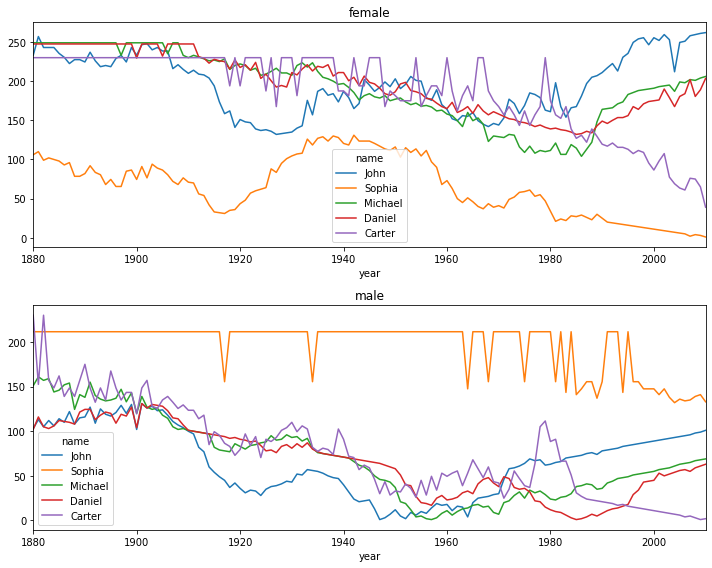

In [173]:
#3. 다음 이름의 연도별 순위 조사 ("John","Sophia", "Michael", "Daniel", "Carter") #다시풀기
import matplotlib.pyplot as plt

names_t=names.pivot_table("births",index=["sex","year"], columns="name", aggfunc=sum)
names_t=names_t.fillna(0)
df=names_t[["John","Sophia", "Michael", "Daniel", "Carter"]].rank(ascending=False)
fig,axes=plt.subplots(2,1,figsize=(10,8))
df.loc["F",:].plot(ax=axes[0], title="female") #여자아이
df.loc["M",:].plot(ax=axes[1], title="male") #남자아이
plt.tight_layout()

In [216]:
#4. 각 연도별, 성별 상위 50% 이름을 구성하는 알파벳 문자 중, 자음과 모음의 비율 분석

#각 이름별 비율
def add_prop(group):
    births=group.births.sum()
    group["prop"]=group.births/births
    return group
names=names.groupby(["sex","year"]).apply(add_prop)
names

#상위 50%이름
def get_qc(group,q=0.5):
    group=group.sort_index(by="prop", ascending=False)
    return group.prop.cumsum().searchsorted(q)
names.groupby(["year","sex"]).apply(get_qc)



C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  del sys.path[0]


year  sex
1880  F       37
      M       13
1881  F       37
      M       13
1882  F       37
            ... 
2008  M      108
2009  F      240
      M      113
2010  F      245
      M      116
Length: 262, dtype: int64

In [14]:
#5. 가장 긴 이름과 가장 짧은 이름을 출력 #다시풀기
names_ar=names["name"].values
name_len=[]

for i in range(0,len(names_ar)):
    name_len.append(len(names_ar[i]))
print(max(name_len)) #15
print(min(name_len)) #2    

15
2


In [13]:
for i in range(0,len(names_ar)):
    if len(names_ar[i])==15:
        print(names_ar[i])

Christophermich
Johnchristopher
Christophermich
Christopherjohn
Mariadelrosario
Christopherjohn
Mariadelosangel
Christopherjohn
Christophermich
Christopherjohn
Franciscojavier
Johnchristopher
Mariadelosangel
Mariadelrosario
Johnchristopher
Christophermich
Michaelchristop
Ashleyelizabeth
Mariadelosangel
Mariadelrosario
Christopherjame
Christopherjohn
Johnchristopher
Franciscojavier
Mariadelosangel
Franciscojavier
Christopherryan
Christopherjame
Christopherjohn
Johnchristopher
Kevinchristophe
Seanchristopher
Franciscojavier
Johnchristopher
Ryanchristopher
Christopherjohn
Markchristopher
Christopherpaul
Seanchristopher
Franciscojavier
Johnchristopher
Ryanchristopher
Franciscojavier
Johnchristopher
Christopherjohn
Christophermich
Laurenelizabeth
Johnchristopher
Christopherjohn
Ryanchristopher
Franciscojavier
Jonathanmichael
Joshuaalexander
Christopherjohn
Franciscojavier
Johnchristopher
Johnchristopher
Christopherjame
Franciscojavier
Christiandaniel
Christopherjohn
Jonathanmichael
Francisc

In [15]:
for i in range(0,len(names_ar)):
    if len(names_ar[i])==2:
        print(names_ar[i])

Ed
Wm
Al
Ab
Jo
Ed
Al
Wm
Ed
Al
Wm
Ab
Jo
Ed
Al
Wm
Jo
Ed
Wm
Al
Ah
Jo
Ed
Wm
Al
Ab
Ng
Jo
Lu
Ed
Al
Wm
Lu
Jo
Ed
Al
Wm
Ah
Ab
Jo
Lu
Ed
Wm
Al
Le
Ad
Jo
Lu
Ed
Al
Wm
Jo
Ed
Wm
Al
Jo
Lu
Ed
Al
Wm
Jo
Ed
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Jo
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Jo
Ed
Al
Wm
Jo
Ed
Al
Wm
Jo
Lu
Ed
Wm
Al
Jo
Ed
Lu
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Jo
Ed
Al
Wm
Jo
Ed
Al
Wm
Cy
Jo
Ed
Al
Wm
Jo
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Bo
Cy
Jo
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Jo
Lu
Ed
Al
Wm
Jo
Cy
Le
Jo
Lu
Ed
Al
Wm
Cy
Ah
Mc
Ad
Jo
Lu
La
Ed
Al
Wm
Jo
Le
Cy
Jc
Ah
Jo
Lu
Al
Ed
Al
Wm
Le
Hy
Jb
Ah
Ad
Cy
Jc
De
Jd
Jo
Jt
Jo
Ed
Lu
Wm
Ah
Ed
Al
Wm
Cy
Le
Hy
Ah
Jo
El
Jc
Jd
Jr
Jb
Mc
Ty
Jo
Lu
Le
Ed
Wm
Al
Vi
Ed
Al
Wm
Le
Jd
Jo
Bo
Cy
Jb
Jc
Ab
De
Hy
Ad
Ah
El
Ty
Jt
Mc
Jo
Lu
Ed
Wm
Al
Ed
Al
Wm
De
Jc
Le
Jr
Ac
Ad
Hy
Jo
Sy
Ab
Ah
Cy
Jt
Lc
Mc
Od
Tj
Ty
Wc
Jo
Ed
Lu
La
Al
De
Ed
Al
Wm
Jo
Jc
Cy
Jr
Ld
Ah
Le
Bo
El
Jd
Mc
Rc
Ab
Jb
Lu
De
Lc
Sy
Ty
Jo
Lu
Al
La
Ed
Wm
Ed
Al
Wm
Jo
Cy
Jc
Jr
Lc
Le
Ah
Jb
Jt
Ld
Jd
Jw
Bo
Lu
Ty
Be
Eb
Jl
Mc
St
Jo
Lu
Wm
Ed
La
Lo
Ed
A

Vy
An
Kc
Ma
Vi
Le
Mi
Ha
De
Ty
Bo
Ai
Ja
Ly
Ta
Yu
Ia
Da
So
Cj
Dj
Mc
Na
Su
Ji
Ko
Ty
Bo
Al
Kc
Cy
Tj
De
Aj
Ky
Cj
An
Jc
Jd
Vu
Dj
Ed
La
Le
Jr
Sy
Tu
Yu
Rj
Bj
Da
Jt
Ac
Ki
Jo
Ka
Ho
Ly
Jb
Jw
Lc
Lj
My
Na
Si
Vi
Ej
Ja
Kj
Rc
Ii
Ji
Jp
Lo
Mc
Md
Su
Pa
Jo
Ka
La
Kc
Vy
Mc
My
An
Ma
Vi
Ai
De
Bo
Mi
Ty
Ha
Cj
Yu
Ji
Le
Ly
Ia
Da
Ja
Su
Dj
Kd
Ki
Tu
Ky
Na
Li
Lu
Ty
Bo
Al
Kc
Cy
Cj
De
Tj
Aj
Ky
An
Dj
Jr
Ed
Jd
Jc
Vu
Bj
Da
Jt
Sy
Yu
Jb
Le
Tu
Jw
La
Ry
Ja
Jj
Ki
Mc
Lj
My
Pj
Rj
Jl
Md
Jo
Lc
Ly
Mr
Na
Rb
Ta
Vi
Yi
Pa
Jo
Ka
La
Kc
Ma
An
Mc
Vy
My
Vi
Ty
De
Yu
Ai
Da
Li
Mi
Bo
Le
Su
Na
Ha
Ia
Ja
Ji
Cj
Ky
Ly
Ta
Ty
Bo
Al
Cy
Kc
Tj
Cj
Jc
De
Aj
Ed
An
Dj
Jr
Ky
Jd
Rj
Sy
Bj
Jb
La
Vu
Jt
Ja
Jj
Jw
Yu
Da
Ji
Le
El
Lc
Rc
Vi
Yi
Ab
Ac
Jo
Li
Lu
Ry
Vy
Ej
Jp
Md
My
Ra
St
Tu
Pa
Jo
Vi
Kc
Ka
Vy
An
La
Ma
Mi
My
Mc
Ty
De
Le
Na
Yu
Bo
Ha
Ky
Ly
Su
Ai
Cj
Ia
Ji
Li
Ra
Yi
Ty
Bo
Al
Cy
Kc
De
Aj
Cj
Ky
Tj
An
Jr
Jc
Jd
Rj
Bj
Lc
Vu
La
Jt
Ka
Ry
Jj
Jo
Sy
Tu
Yu
Ed
Ki
Le
Vi
Wa
Dj
Jb
Jw
Da
Ha
Ja
Ly
Mc
Md
Jo
Pa
La
Mc
Vy
Kc
An
Ka
Vi
Ma
Ty
Na
Le
Mi
Cj
My
Ji
Li
Ha
De
Yu
Da
Ai
Yi
Bo
Fe
L

In [ ]:
2. 영화 평점 데이터를 이용하여 영화 추천 시스템을 작성하시오

*입/출력 예시
당신의 아이디를 입력하시오? 1

당신과 가장 비슷한 영화를 본 고객 아이디는 7번 입니다. 
=> 유클리디안 거리 이용(공통으로 본 영화 2개=> 2차원에서 유클리디안 구하기)

당신과 가장 비슷한 장르를 가지고 있는 고객 아이디는 10번 입니다

당신에게 추천하는 영화는 xxxxx 입니다.